In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
points = pd.read_csv('/content/ML Session 01.csv')
points.head()

,study_Hours,Test_scores
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [ ]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_Hours  99 non-null     float64
 1   Test_scores  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
x = points['study_Hours']
y = points['Test_scores']


Text(0.5, 1.0, 'Dataset')

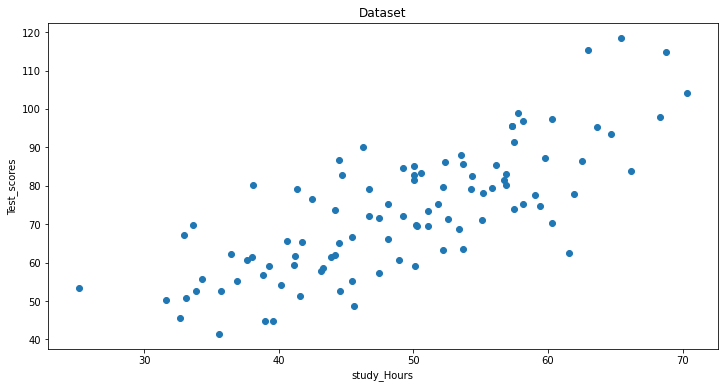

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x,y)
plt.xlabel('study_Hours')
plt.ylabel('Test_scores')

plt.title('Dataset')

# y = a_0 + a_1*x

In [ ]:

# calulate cost function

def compute_cost_fun(a_0,a_1,points):
  total_cost = 0
  N = float(len(points))
  
  for i in range(0,len(points)):
    x = points['study_Hours'][i]
    y = points['Test_scores'][i]

    total_cost += (y - (a_1*x + a_0))**2  # MSE

  return total_cost/N


In [ ]:
# function input ( a_0_current, a_1_current, points, learning_rate)
# function output ( a_0_updated, a_1_updated )

def step_gradient(a_0_current, a_1_current, points, learning_rate):
  a_0_gradient = 0
  a_1_gradient = 0

  N = float(len(points)) 

  for i in range(0,len(points)):

    x = points[i,0]
    y = points[i,1]

    a_0_gradient += -(2/N) * (y - (a_0_current + a_1_current*x))  # D_a_0 
    a_1_gradient += -(2/N) * (y - (a_0_current + a_1_current*x)) * x  # D_a_0 

  a_0_updated = a_0_current - learning_rate * a_0_gradient
  a_1_updated = a_1_current - learning_rate * a_1_gradient


  return a_0_updated, a_1_updated



In [ ]:
points['study_Hours'][30]

35.56783005

In [ ]:
def gradient_descent_runner(points, starting_a_0, starting_a_1, learning_rate, num_iterations):

  a_0 = starting_a_0
  a_1 = starting_a_1

  cost_graph = []
  global a_0_values, a_1_values
  a_0_values, a_1_values = [], []

  for i in range(num_iterations):
    cost_graph.append(compute_cost_fun(a_0,a_1,points))
    a_0,a_1 = step_gradient(a_0,a_1,np.array(points), learning_rate)

    a_0_values.append(a_0)
    a_1_values.append(a_1)

  return [a_0,a_1,cost_graph]

In [ ]:
learning_rate  = 0.0001

num_iterations = 100

intial_a_0 = 0
intial_a_1 = 0

In [ ]:
a_0 , a_1, cost_graph = gradient_descent_runner(points,intial_a_0,intial_a_1, learning_rate,num_iterations )


print("optimized a_0", a_0)
print("optimized a_1", a_1)
print("minimized cost function", compute_cost_fun(a_0,a_1,points))

# MSE
# RMSE

optimized a_0 0.036308009121857374
optimized a_1 1.4809270431911752
minimized cost function 111.0581497156067


Text(0, 0.5, 'cost per iterations')

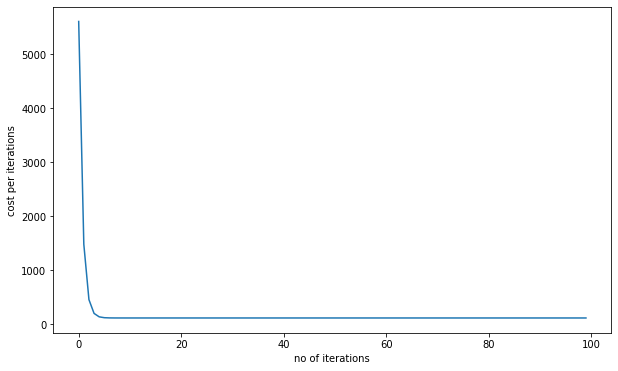

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(cost_graph)

plt.xlabel('no of iterations')
plt.ylabel('cost per iterations')

Text(0.5, 1.0, 'Dataset')

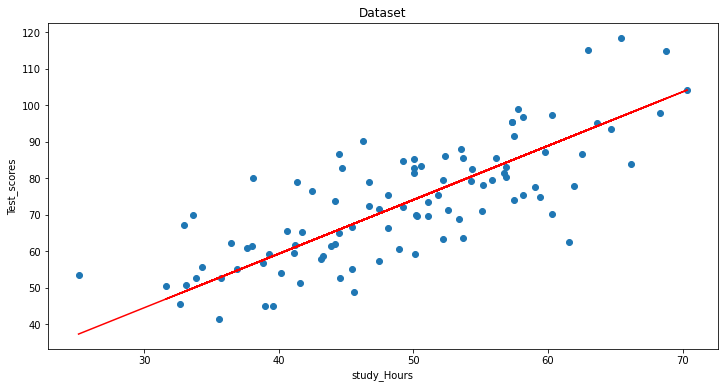

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x,y)

y_pred = a_0 + a_1*x

plt.plot(x,y_pred,c='r')
plt.xlabel('study_Hours')
plt.ylabel('Test_scores')

plt.title('Dataset')

Text(0.5, 1.0, 'Dataset')

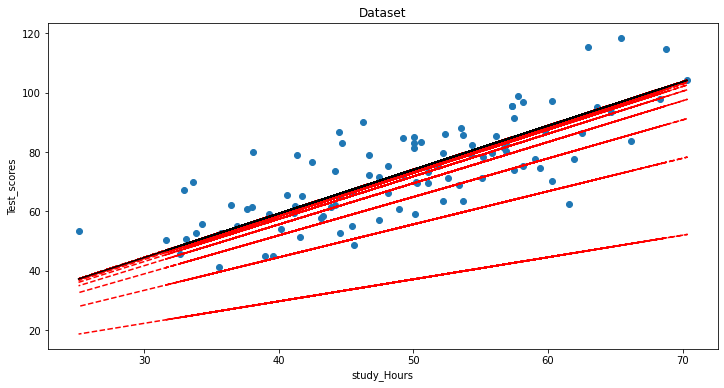

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(x,y)

# y_pred = a_0 + a_1*x

for w,b in zip(a_0_values,a_1_values):

  pred = b*x + w

  plt.plot(x,pred, c= 'r', linestyle='dashed')



plt.plot(x,y_pred,c='black')
plt.xlabel('study_Hours')
plt.ylabel('Test_scores')

plt.title('Dataset')

In [ ]:
iterations = []
for i in range(1, 11):
    # iterations.append(i * 10)
    # iterations.append(i * 100)
    iterations.append(i * 1000)
    # iterations.append(i * 10000)
iterations.sort()
print(iterations)


[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


In [ ]:
lr = []
for i in range(1, 11):
    # lr.append(i / 10)
    # lr.append(i / 100)
    lr.append(i / 1000)
    lr.append(i / 10000)
lr.sort(reverse=False)
print(lr)


[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]


In [ ]:
def get_min_cost(num_iterations, learning_rate):
    intial_a_0 = 0
    intial_a_1 = 0

    min_cost = float('inf')

    for num_iterations in iterations:
        print('Number of iterations:', num_iterations)

        first = True
        for learning_rate in lr:
            print('Learning rate:', learning_rate)

            a_0, a_1, cost_graph = gradient_descent_runner(points, intial_a_0, intial_a_1, learning_rate, num_iterations)

            cost = compute_cost_fun(a_0, a_1, points)

            if not first:
                break
            if cost == float('inf') or cost == float('-inf') or np.isnan(cost):
                continue
            if cost < min_cost:
                min_cost = cost
                best_iter = num_iterations
                best_lr = learning_rate
                # first = False 

    #         print('Optimized a_0:', a_0)
    #         print('Optimized a_1:', a_1)
    #         print('Minimised cost:', cost)
    #         print('Minimum cost reached:', min_cost)
    #         print('--------------------')

    # print('+++ Final minimum cost:', min_cost)

    return best_iter, best_lr, min_cost


In [ ]:
best_iter, best_lr, min_cost = get_min_cost(iterations, lr)

print('Best iterations:', best_iter)
print('Best learning rate:', best_lr)
print('Minimum cost:', min_cost)

Number of iterations: 1000
Learning rate: 0.0001
Learning rate: 0.0002
Learning rate: 0.0003
Learning rate: 0.0004
Learning rate: 0.0005


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Learning rate: 0.0006
Learning rate: 0.0007


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


Learning rate: 0.0008
Learning rate: 0.0009
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.002
Learning rate: 0.003
Learning rate: 0.004
Learning rate: 0.005
Learning rate: 0.006
Learning rate: 0.007
Learning rate: 0.008
Learning rate: 0.009
Learning rate: 0.01
Number of iterations: 2000
Learning rate: 0.0001
Learning rate: 0.0002
Learning rate: 0.0003
Learning rate: 0.0004
Learning rate: 0.0005
Learning rate: 0.0006
Learning rate: 0.0007
Learning rate: 0.0008
Learning rate: 0.0009
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.002
Learning rate: 0.003
Learning rate: 0.004
Learning rate: 0.005
Learning rate: 0.006
Learning rate: 0.007
Learning rate: 0.008
Learning rate: 0.009
Learning rate: 0.01
Number of iterations: 3000
Learning rate: 0.0001
Learning rate: 0.0002
Learning rate: 0.0003
Learning rate: 0.0004
Learning rate: 0.0005
Learning rate: 0.0006
Learning rate: 0.0007
Learning rate: 0.0008
Learning rate: 0.0009
Learning rate: 0.001
Learning rate: 0.001
Lear

In [ ]:
a_0 , a_1, cost_graph = gradient_descent_runner(points, intial_a_0, intial_a_1, 0.0003, 10000)


print("optimized a_0", a_0)
print("optimized a_1", a_1)
print("minimized cost function", compute_cost_fun(a_0,a_1,points))

optimized a_0 1.9862926951031172
optimized a_1 1.4426929976383642
minimized cost function 109.78082637594451


In [ ]:
from sklearn.model_selection import train_test_split

x = points['study_Hours'].values.reshape(-1, 1)
y = points['Test_scores'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20,
                                                    random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([1.2055478])

In [ ]:
lr.intercept_

13.840824136762222